<a href="https://colab.research.google.com/github/BasilaThasni/ANN_Diabetes_Prediction_DL/blob/main/ANN_Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from keras.callbacks import EarlyStopping


#LOADING AND PREPROCESSING:

##Import dataset:

In [2]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [3]:
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [4]:
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['diabetes_progression'] = diabetes.target

In [5]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diabetes_progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


##**The dataset is already scaled.So,no further scaling is needed.**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   442 non-null    float64
 1   sex                   442 non-null    float64
 2   bmi                   442 non-null    float64
 3   bp                    442 non-null    float64
 4   s1                    442 non-null    float64
 5   s2                    442 non-null    float64
 6   s3                    442 non-null    float64
 7   s4                    442 non-null    float64
 8   s5                    442 non-null    float64
 9   s6                    442 non-null    float64
 10  diabetes_progression  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


##No null values detected.

In [7]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diabetes_progression
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [8]:
df.duplicated().sum()

0

##No duplicated rows

##Outlier Detection:


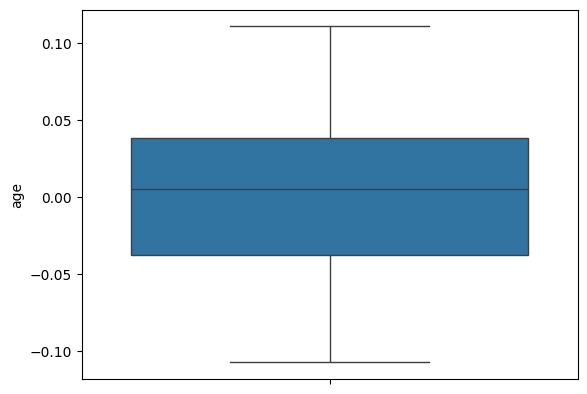

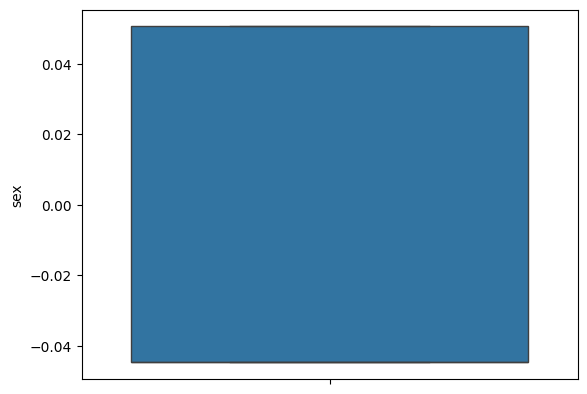

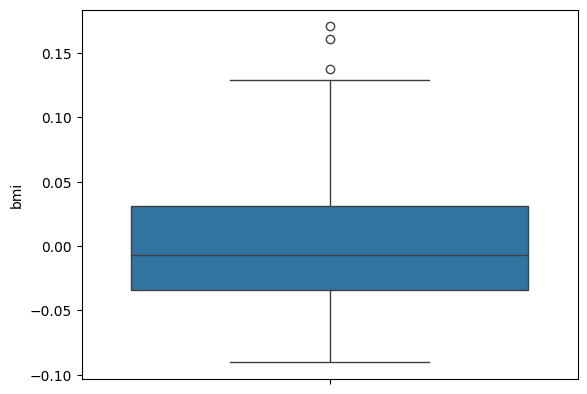

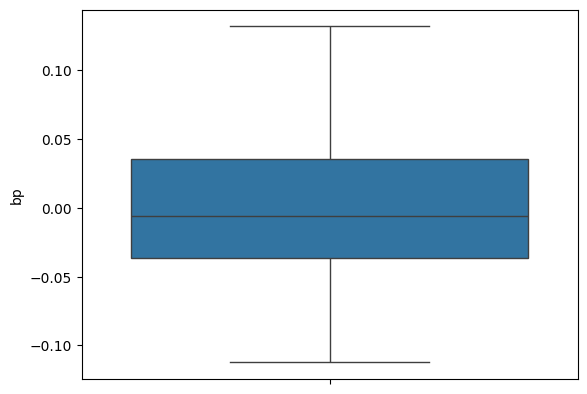

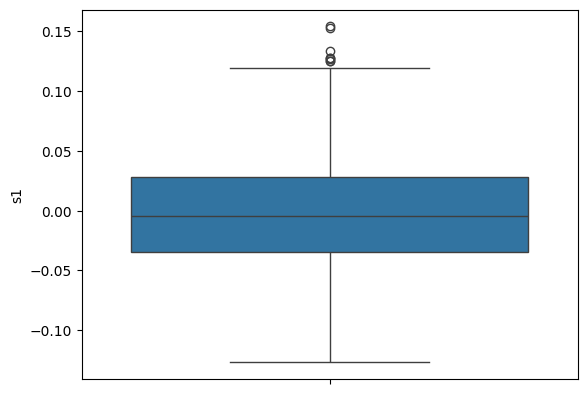

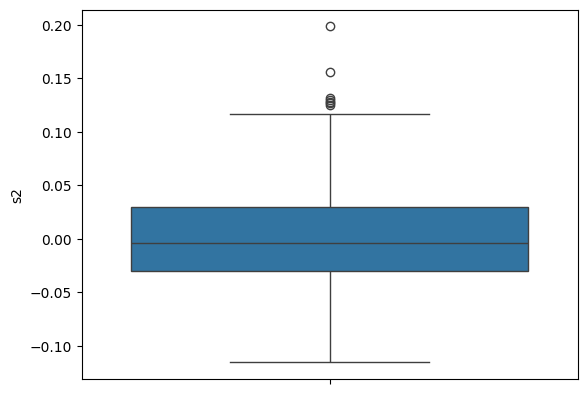

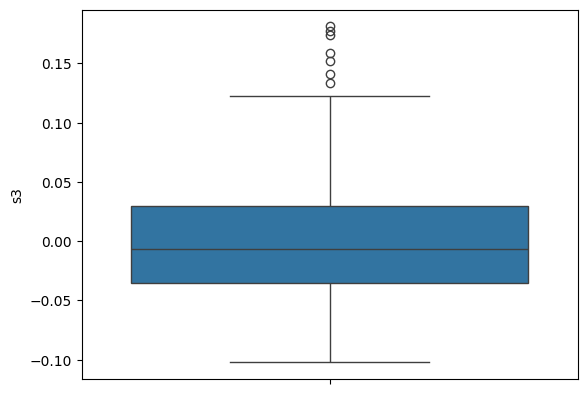

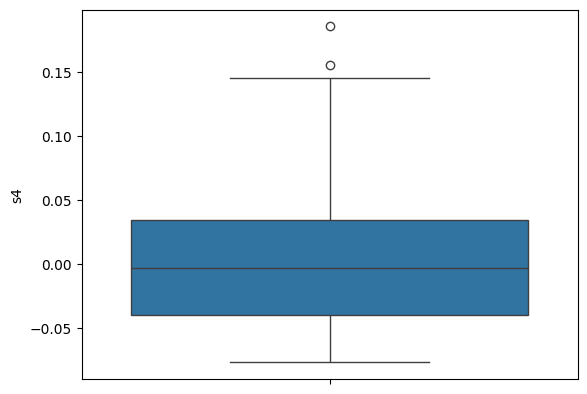

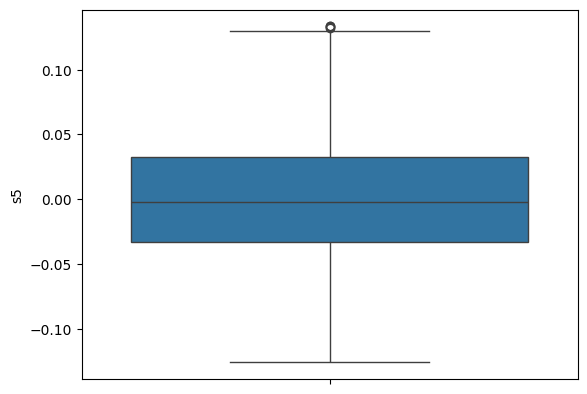

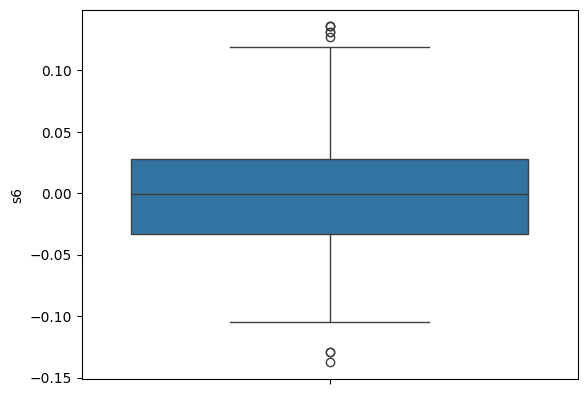

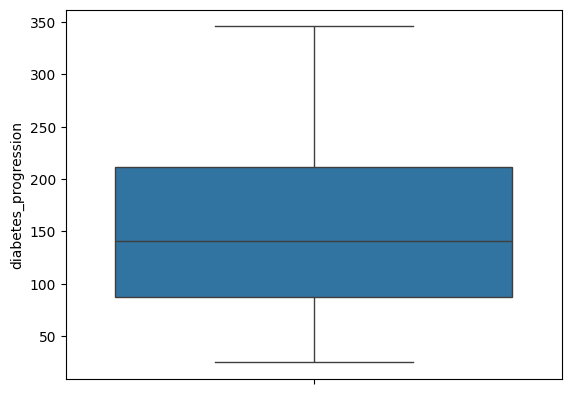

In [13]:
for col in df.columns:
  sns.boxplot(df[col])
  plt.show()
  print(" ")

In [14]:
#"bmi","s1',"s2","s3","s4","s5","s6"
for column in ["bmi","s1","s2","s3","s4","s5","s6"]:
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df[column] = np.where(df[column] < lower_bound, lower_bound,np.where(df[column] > upper_bound, upper_bound, df[column]))


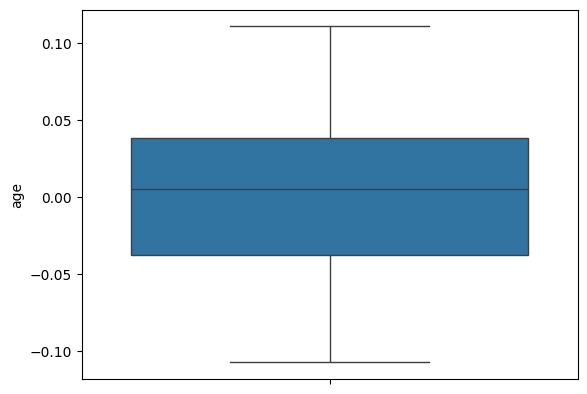

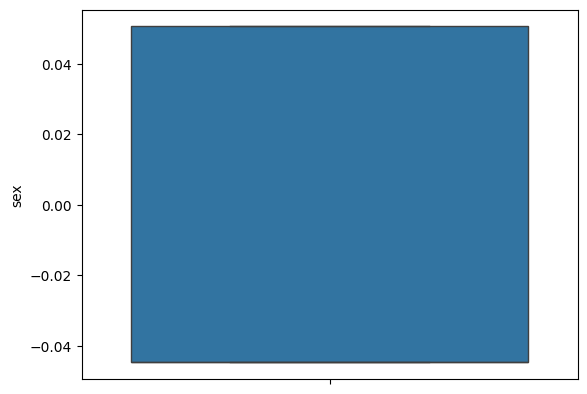

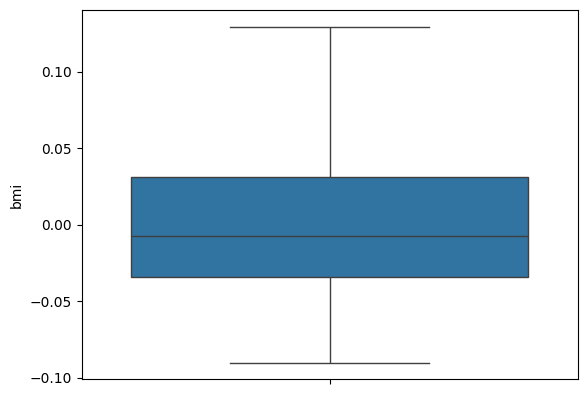

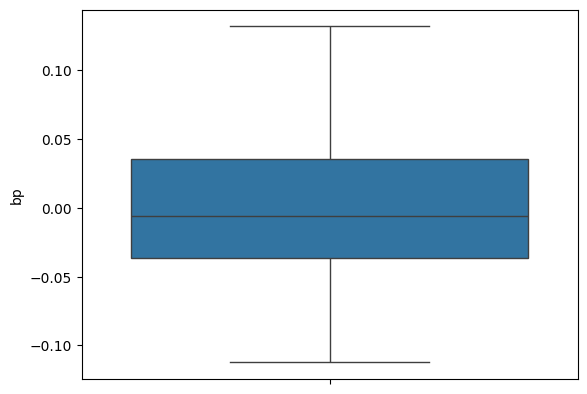

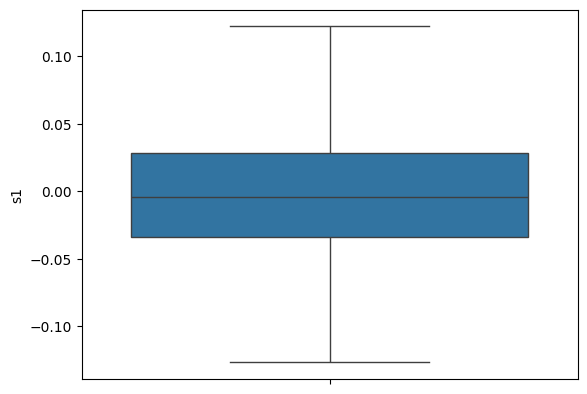

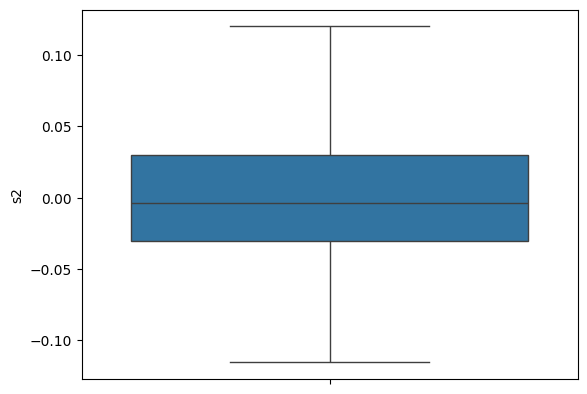

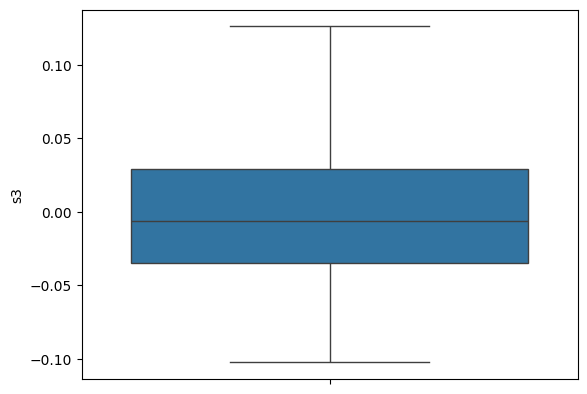

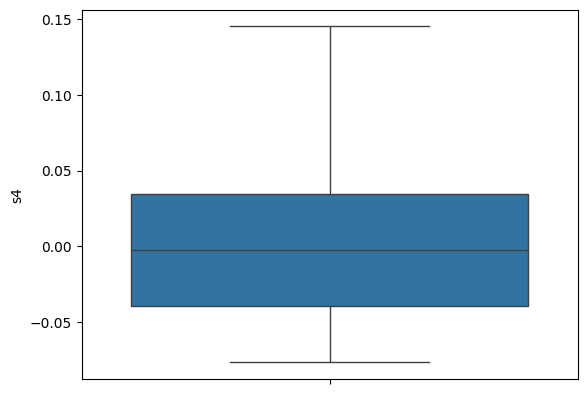

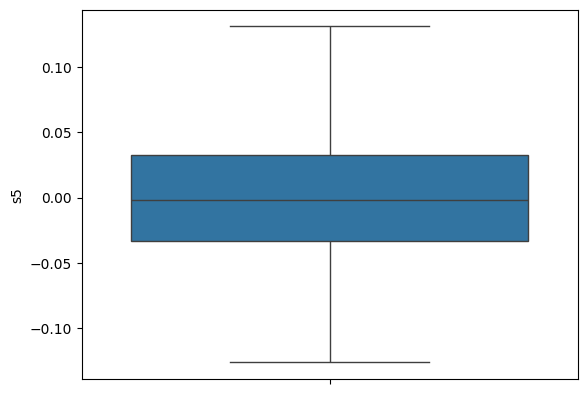

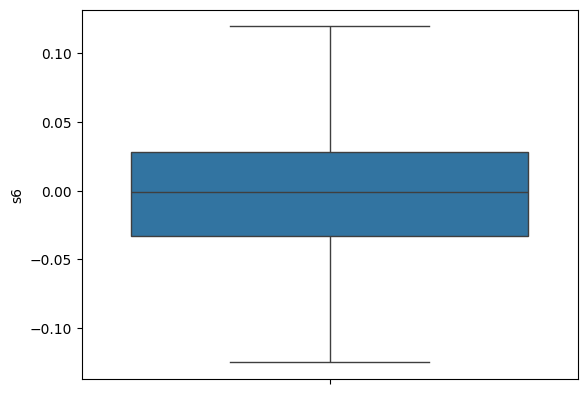

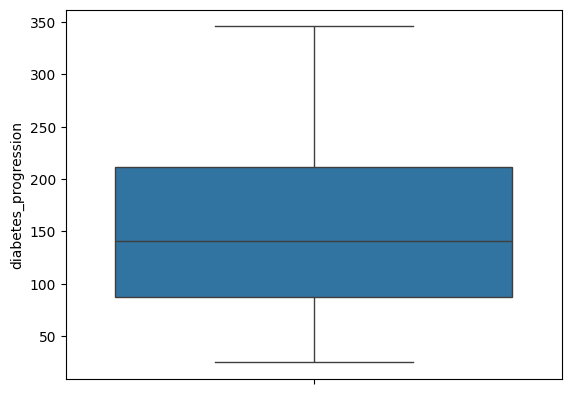

In [15]:
for col in df.columns:
  sns.boxplot(df[col])
  plt.show()
  print(" ")

##Normalise Train-Test Split:

In [16]:
x = df.drop("diabetes_progression",axis=1)
y = df["diabetes_progression"]

In [17]:
x

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [18]:
y

,diabetes_progression
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


#EXPLORATORY DATA ANALYSIS:

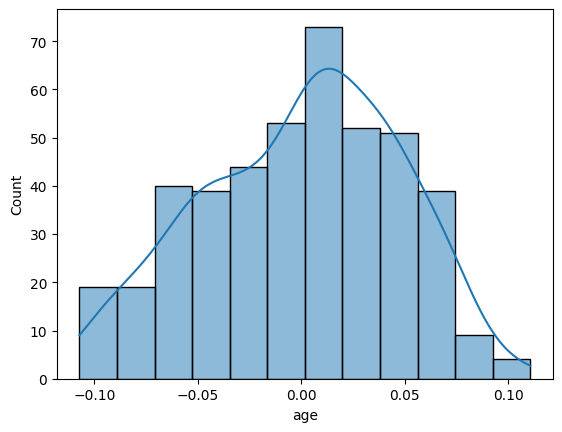

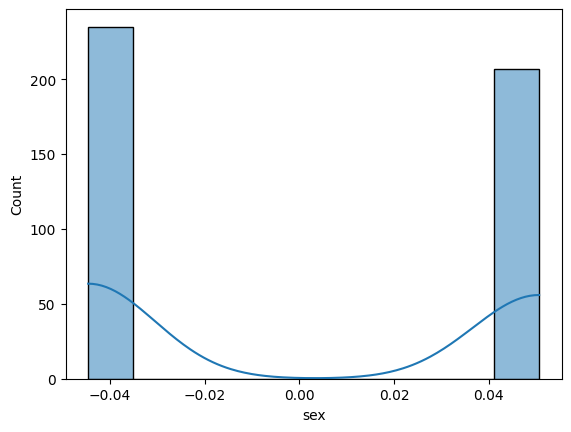

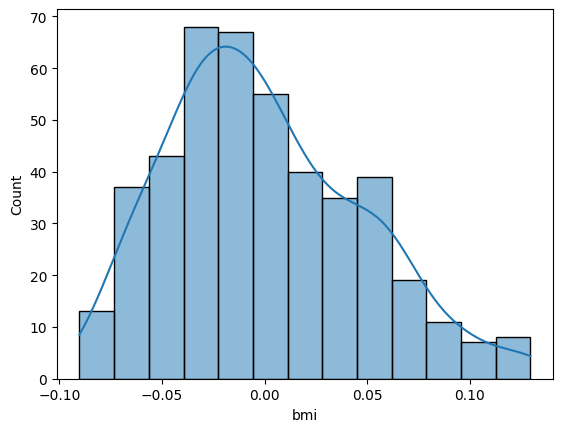

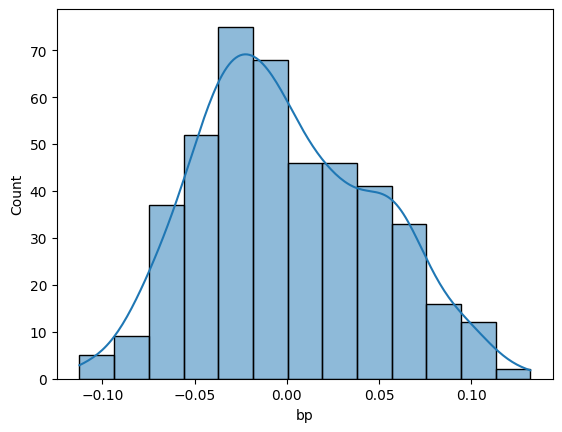

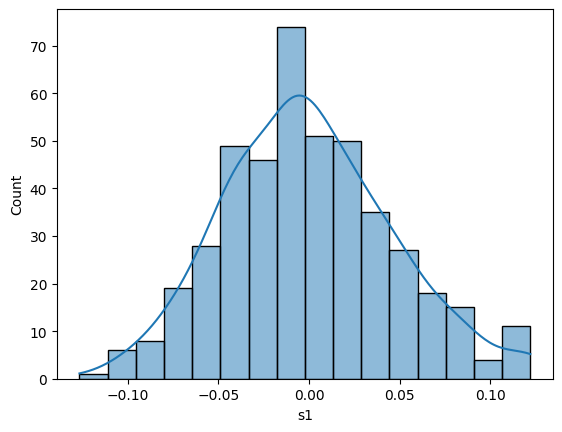

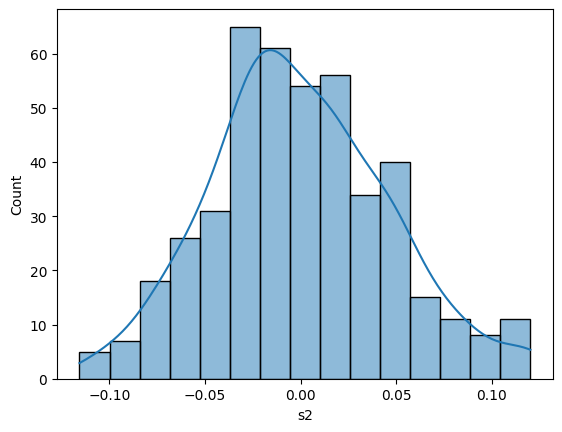

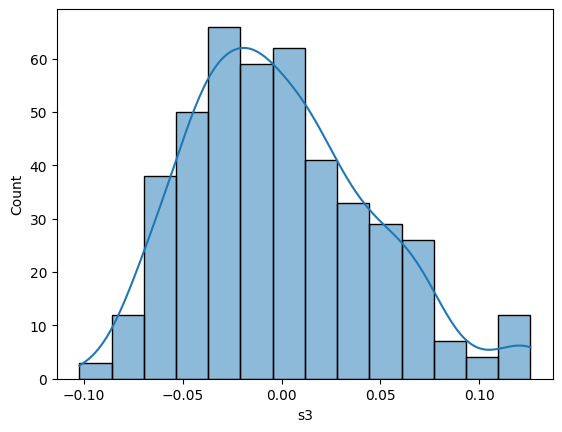

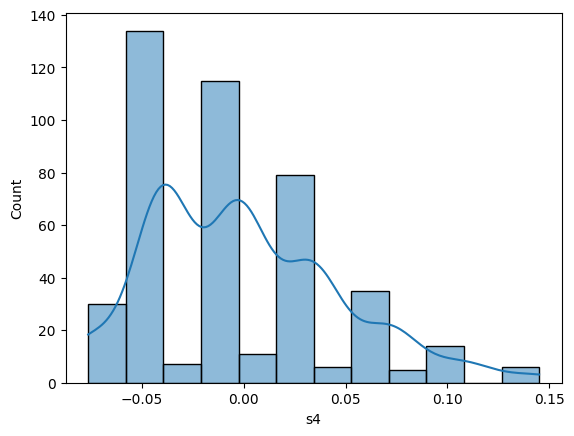

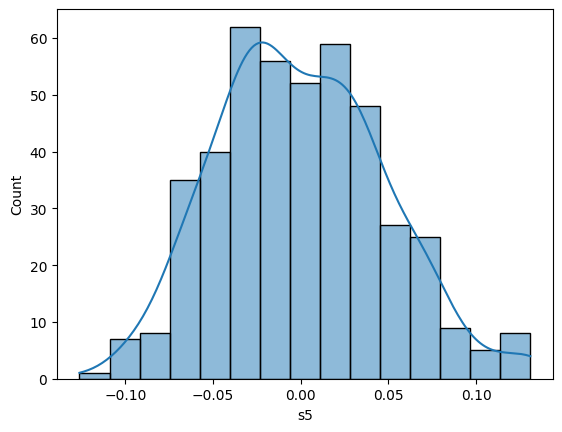

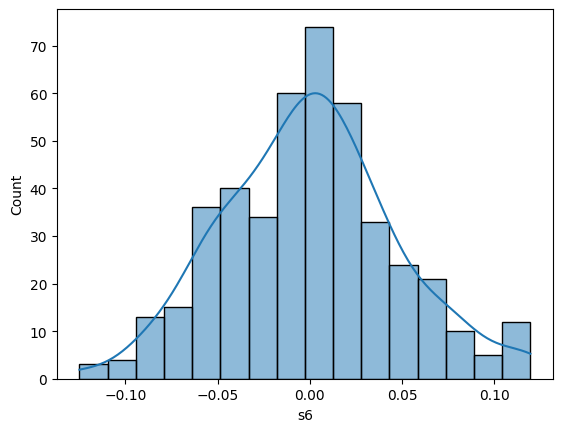

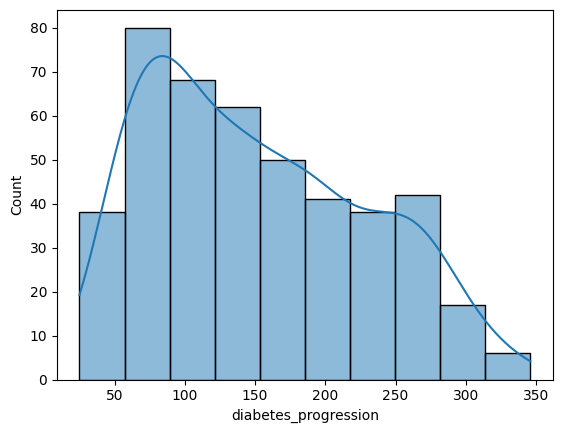

In [23]:
for col in df.columns:
  sns.histplot(df[col],kde=True)
  plt.show()
  print("")

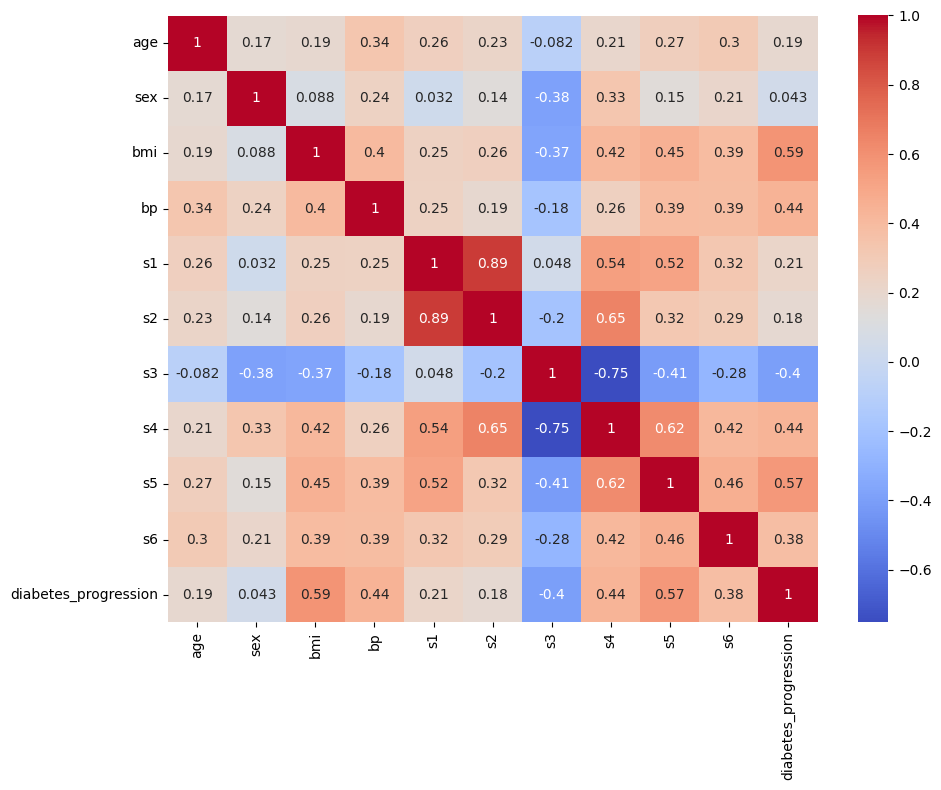

In [27]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.tight_layout()
plt.show()

##Correlation:
##Positive correlation:bp,bmi,s5,s4,s6
##Weak positive correlation:age,sex,s1,s2
##Negative correlation:s3

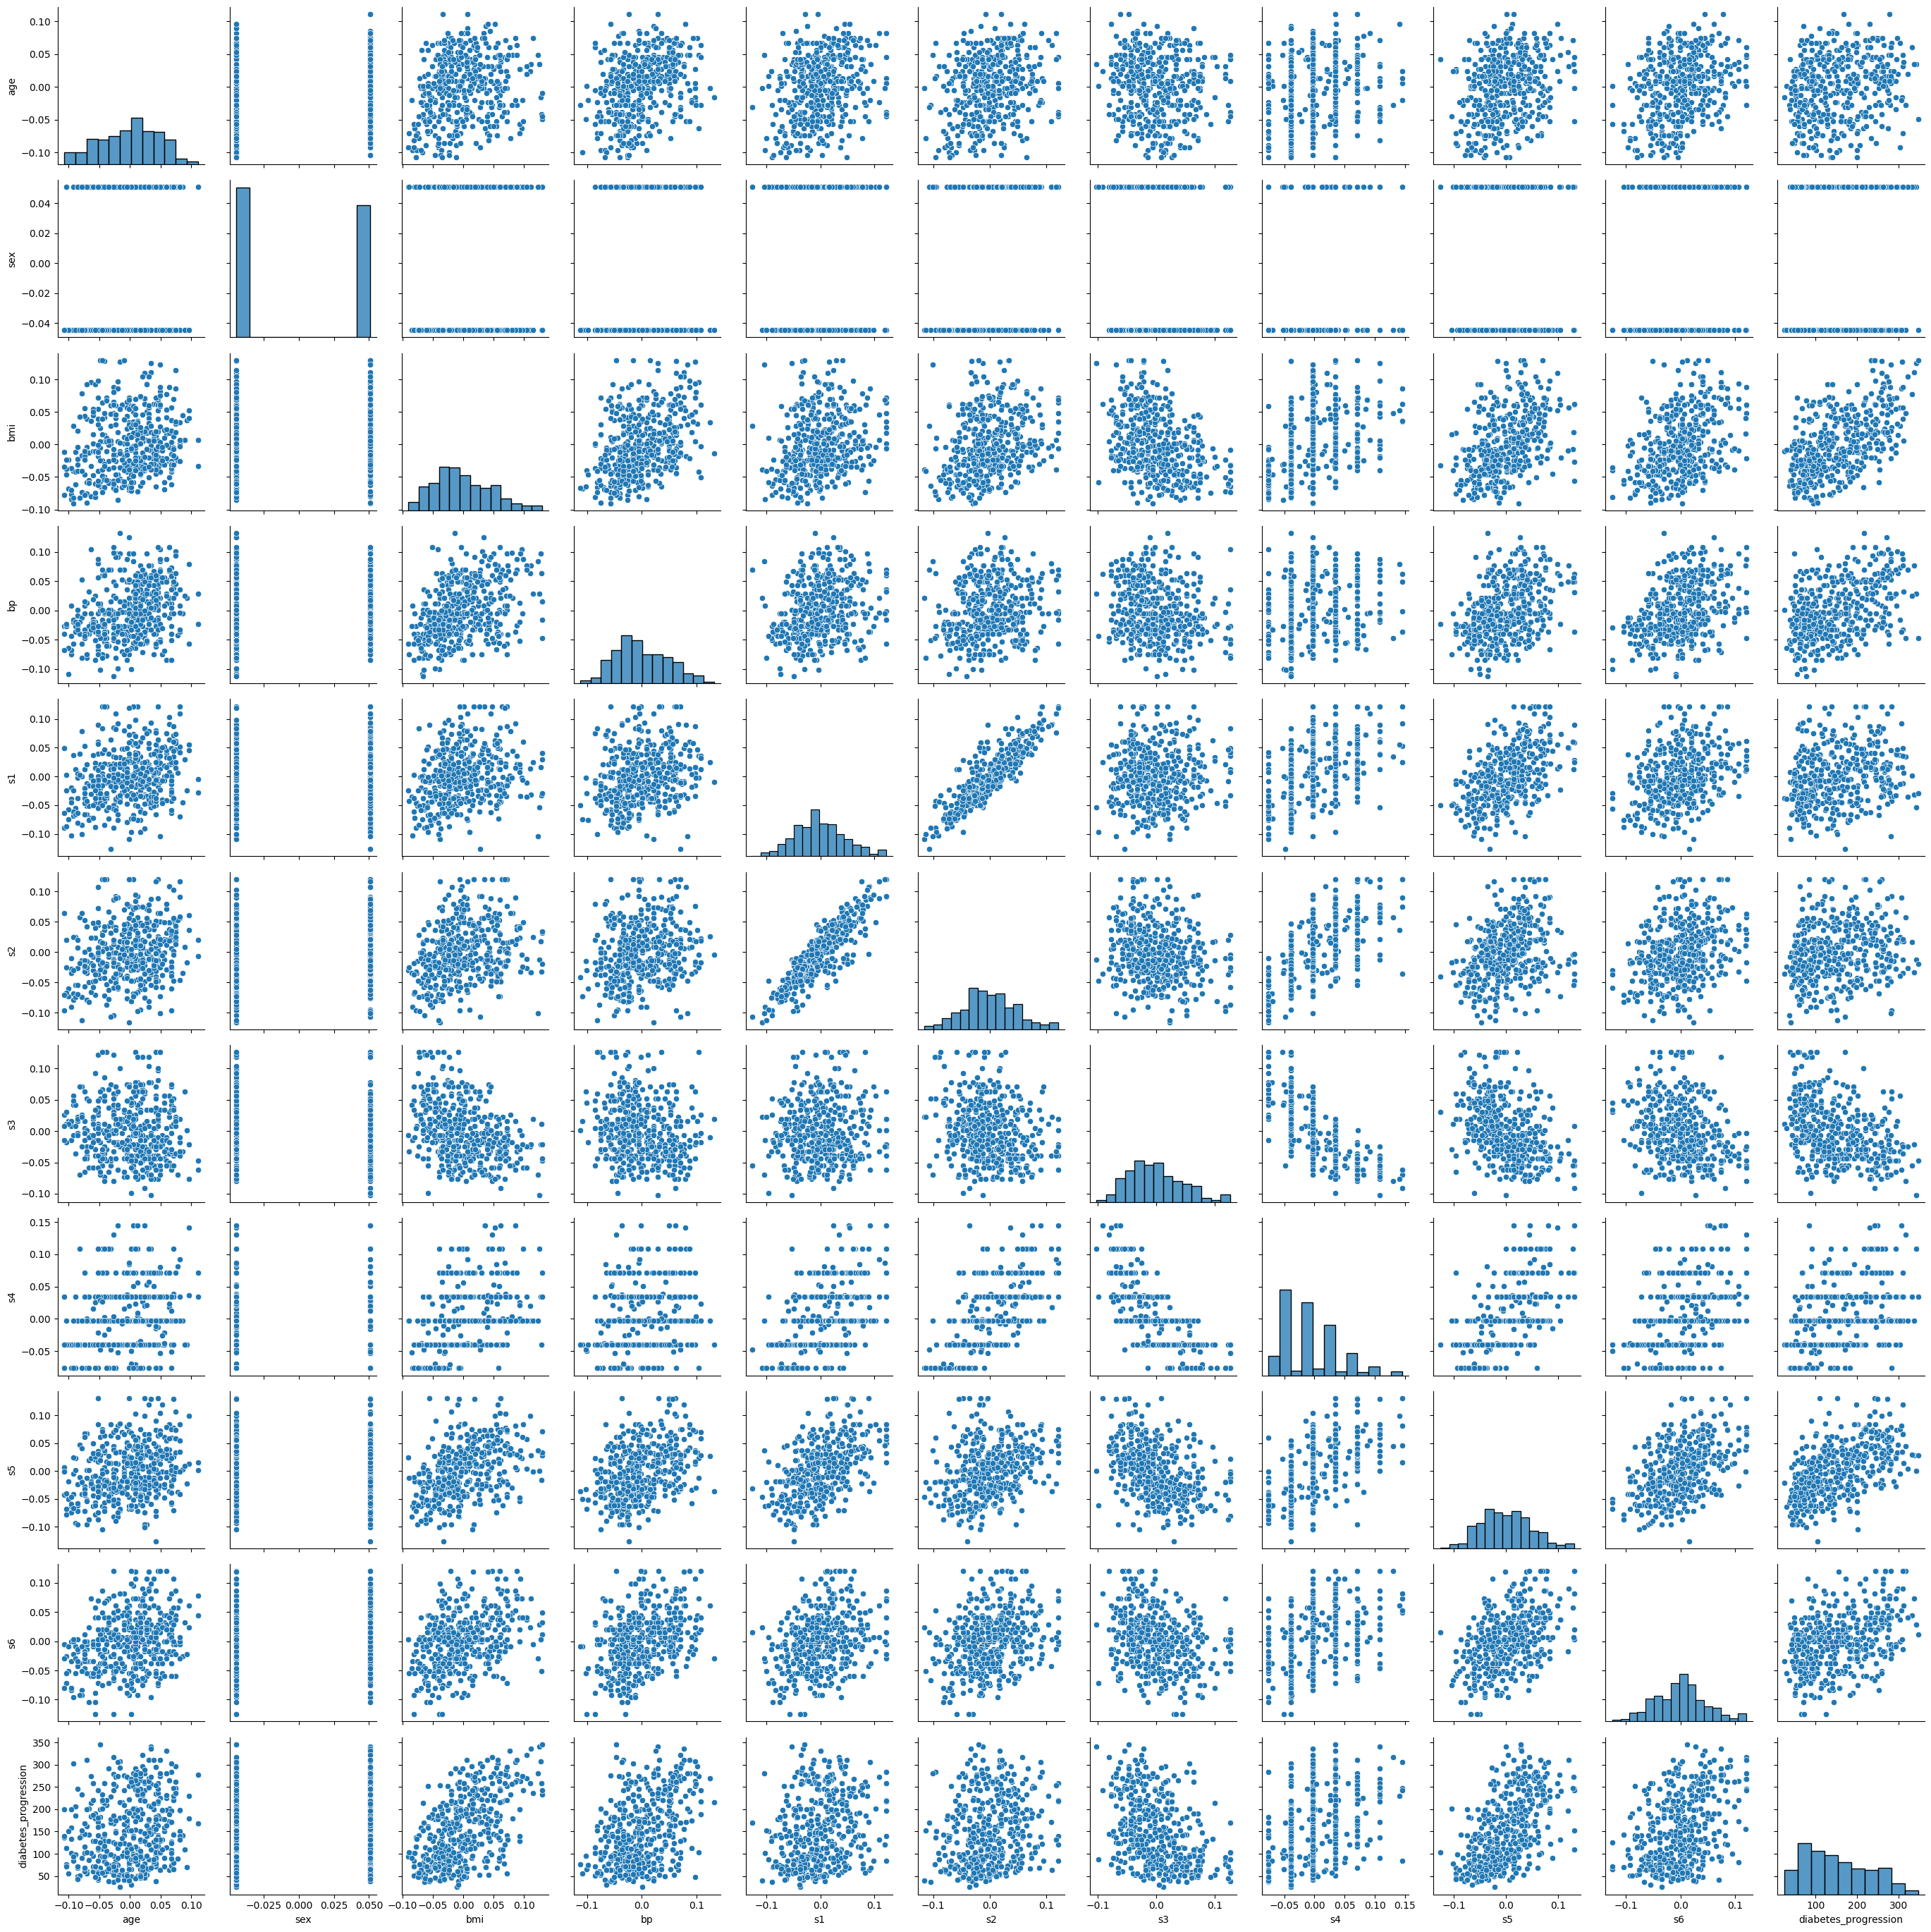

In [29]:
sns.pairplot(df)
plt.tight_layout()
plt.show()

* bmi and s5 show strong linear relation with the target variable.
* s3 shows negative linear relation with the target variable.



#BUILDING ANN MODEL:

In [30]:
model= Sequential()
model.add(Dense(10))
model.add(Dense(6,activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer=Adam(learning_rate=0.001),metrics=['mae'])


#TRAIN THE MODEL:

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [32]:
history = model.fit(x_train,y_train,epochs=100,batch_size=32,validation_split=0.2)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 30205.3652 - mae: 153.5902 - val_loss: 22477.0469 - val_mae: 134.0569
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 30617.8555 - mae: 156.0760 - val_loss: 22464.1523 - val_mae: 134.0094
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 31240.1426 - mae: 157.0998 - val_loss: 22449.6191 - val_mae: 133.9555
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 30796.8164 - mae: 157.0071 - val_loss: 22432.8164 - val_mae: 133.8932
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 31913.3730 - mae: 159.6939 - val_loss: 22413.5488 - val_mae: 133.8223
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 30668.7578 - mae: 156.1510 - val_loss: 22391.6055 - val_mae: 133.7417
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 31447.8574 - mae: 156.6763 - val_loss: 22366.3672 - val_mae: 133.6489
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 30012.5840 - mae: 155.6078 - val_loss: 22337.6484

#EVALUATION OF MODEL:

In [43]:
y_predict = model.predict(x_test)
y_predict = y_predict.flatten()
loss_mae = model.evaluate(x_test,y_test)
mse = mean_squared_error(y_test,y_predict)
mae = mean_absolute_error(y_test,y_predict)
r2 = r2_score(y_test,y_predict)
print("Mean Squared Error:",mse)
print("Mean Absolute Error:",mae)
print("R2 Score:",r2)
print("Loss and MAE:",loss_mae[0])

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4062.3542 - mae: 52.0050 
Mean Squared Error: 3724.1753335448493
Mean Absolute Error: 50.49344789312127
R2 Score: 0.29708028189499114
Loss and MAE: 3724.175537109375


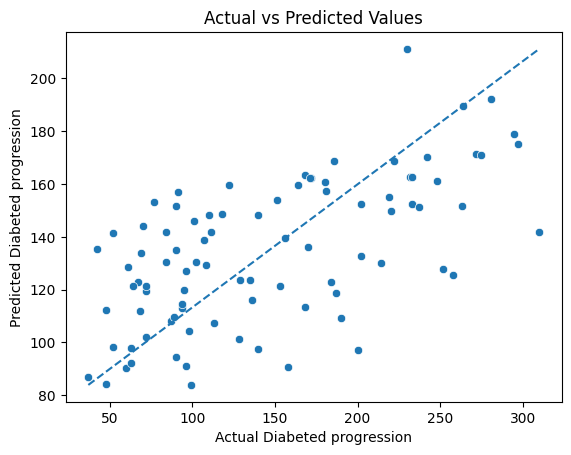

In [42]:
sns.scatterplot(x=y_test,y=y_predict)
plt.xlabel("Actual Diabeted progression")
plt.ylabel("Predicted Diabeted progression")
plt.title("Actual vs Predicted Values")
plt.plot([min(y_test),max(y_test)],[min(y_predict),max(y_predict)],linestyle='--')
plt.show()

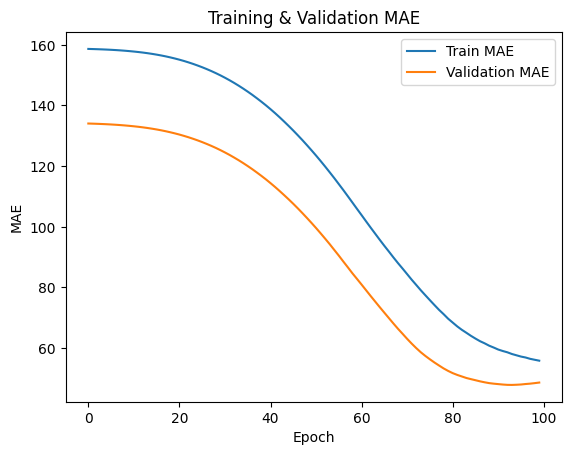

In [44]:
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training & Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()



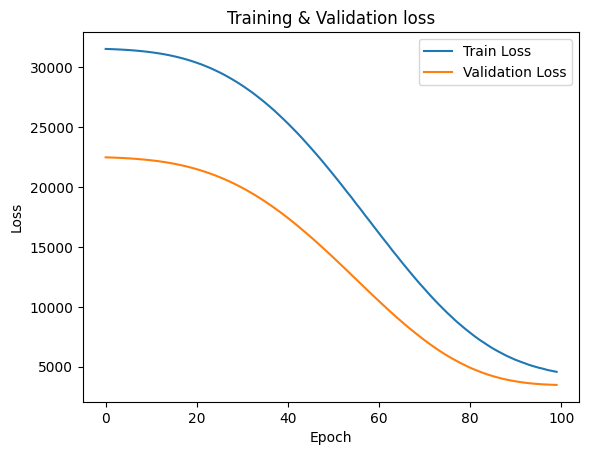

In [45]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [46]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              66 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               7 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 551 (2.16 KB)

 Trainable params: 183 (732.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 368 (1.44 KB)

#IMPROVING THE MODEL:

In [116]:
model_improved = Sequential()
model_improved.add(Dense(10))
model_improved.add(Dense(20,activation='relu'))
model_improved.add(Dense(10,activation='relu'))
model_improved.add(Dense(1,activation='linear'))
model_improved.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

In [117]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_improved_history = model_improved.fit(x_train, y_train, epochs=50, batch_size=16, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 31222.1562 - mae: 157.1539 - val_loss: 27448.8379 - val_mae: 147.3758
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 30687.2246 - mae: 155.8657 - val_loss: 27328.9707 - val_mae: 146.9739
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 28479.0117 - mae: 149.9760 - val_loss: 27108.1641 - val_mae: 146.2327
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 27459.5781 - mae: 147.1820 - val_loss: 26717.7266 - val_mae: 144.9189
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 29102.8027 - mae: 151.0203 - val_loss: 26051.1289 - val_mae: 142.6566
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 29031.2012 - mae: 152.1445 - val_loss: 24984.2227 - val_mae: 138.9706
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 28750.4707 - mae: 148.8371 - val_loss: 23398.8398 - val_mae: 133.3248
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 23076.7832 - mae: 132.4815 - val_loss: 21191

In [118]:
y_predict = model_improved.predict(x_test)
y_predict = y_predict.flatten()
loss_mae = model_improved.evaluate(x_test,y_test)
mse = mean_squared_error(y_test,y_predict)
mae = mean_absolute_error(y_test,y_predict)
r2 = r2_score(y_test,y_predict)
print("Mean Squared Error:",mse)
print("Mean Absolute Error:",mae)
print("R2 Score:",r2)
print("Loss and MAE:",loss_mae[0])

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3168.3701 - mae: 45.9616 
Mean Squared Error: 3009.0499729243875
Mean Absolute Error: 44.71438165728966
R2 Score: 0.43205666508761775
Loss and MAE: 3009.0498046875


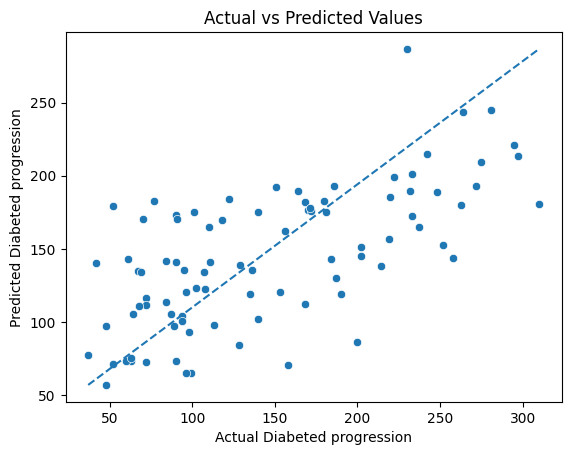

In [119]:
sns.scatterplot(x=y_test,y=y_predict)
plt.xlabel("Actual Diabeted progression")
plt.ylabel("Predicted Diabeted progression")
plt.title("Actual vs Predicted Values")
plt.plot([min(y_test),max(y_test)],[min(y_predict),max(y_predict)],linestyle='--')
plt.show()

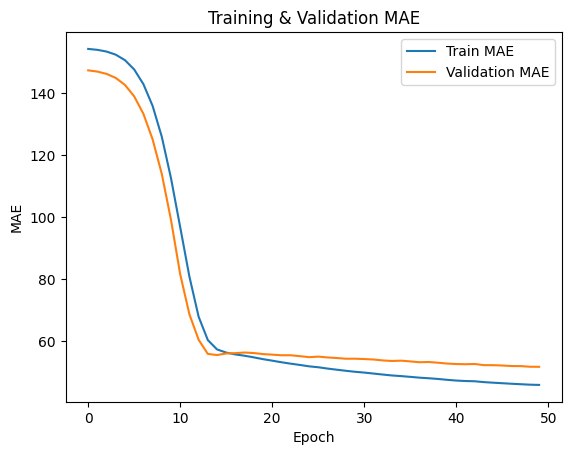

In [120]:
plt.plot(model_improved_history.history['mae'], label='Train MAE')
plt.plot(model_improved_history.history['val_mae'], label='Validation MAE')
plt.title('Training & Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.show()



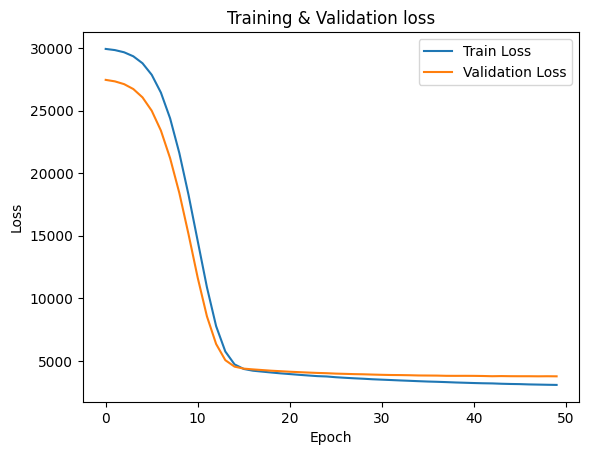

In [121]:
plt.plot(model_improved_history.history['loss'], label='Train Loss')
plt.plot(model_improved_history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [122]:
model_improved.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_104 (Dense)                    │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_105 (Dense)                    │ (None, 20)                  │             220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_106 (Dense)                    │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_107 (Dense)                    │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,655 (6.47 KB)

 Trainable params: 551 (2.15 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,104 (4.32 KB)

###Changes made:

* Added hidden layers.
* Tried different combinations of neurons.
* Adjusted validation split.
* Tried different epoch.
* Added early stopping to prevent model overfitting.

###BEFORE Model Improvement:

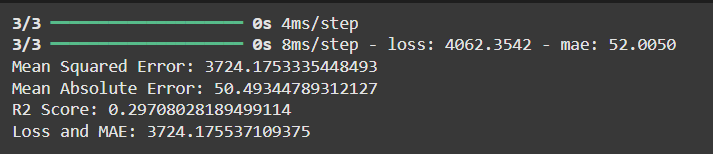




###AFTER Model Improvement:

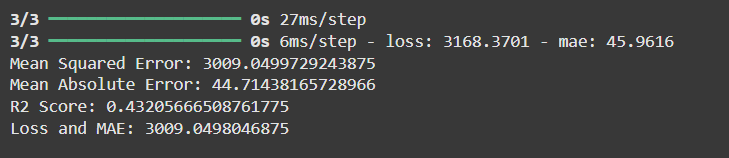